In [18]:
%reload_ext autoreload
%autoreload 2
from gunpowder_augmentor import process_zarr_data
import matplotlib.pyplot as plt
import numpy as np
import gunpowder as gp

In [19]:
load_path = '/mnt/efs/shared_data/hack/data/20230811/20230811_raw.zarr'
output_shape = (10, 265, 265)
stack_size = 8
device = 'cpu'

result_batch = process_zarr_data(load_path, output_shape, stack_size, device)

print("Raw shape: " + str(result_batch[gp.ArrayKey('RAW')].data.shape))
print("Ground truth shape: " + str(result_batch[gp.ArrayKey('GROUND_TRUTH')].data.shape))

Raw shape: (8, 10, 265, 265)
Ground truth shape: (8, 10, 265, 265)


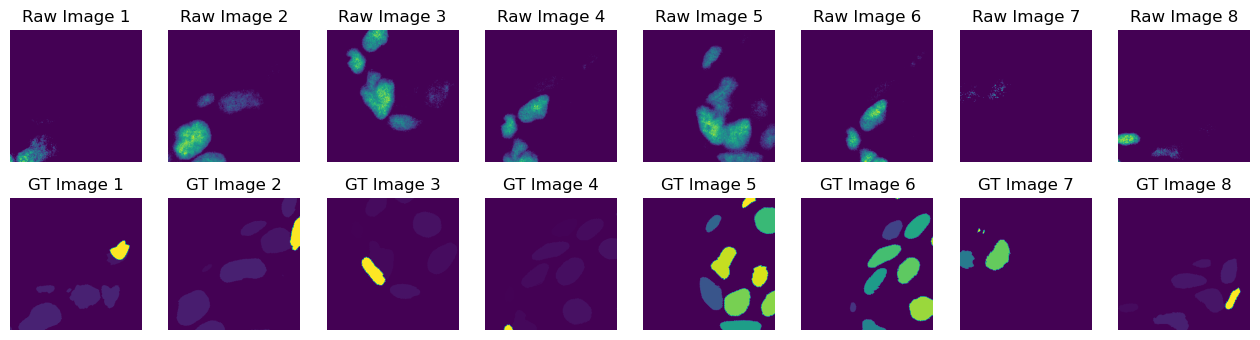

In [20]:
# Assuming 'data' is your 3D volume data
# You can replace this with your actual data
raw_data = result_batch[gp.ArrayKey('RAW')].data
gt_data = result_batch[gp.ArrayKey('GROUND_TRUTH')].data

# Select the z-slice (e.g., the middle one)
z_slice = raw_data.shape[1] // 2  # Assuming the z-dimension is the second dimension

# Select all stack images for both raw and GT
raw_images = raw_data[:, z_slice, :, :]
gt_images = gt_data[:, z_slice, :, :]

# Create a figure with subplots
fig, axes = plt.subplots(2, len(raw_images), figsize=(stack_size*2, 4))

# Iterate through the images and plot each one
for i in range(len(raw_images)):
    axes[0][i].imshow(raw_images[i], cmap='viridis')
    axes[0][i].set_title(f'Raw Image {i+1}')
    axes[0][i].axis('off')

    axes[1][i].imshow(gt_images[i], cmap='viridis')
    axes[1][i].set_title(f'GT Image {i+1}')
    axes[1][i].axis('off')

# Show the plot
plt.show()